In [11]:
import regex as re
from collections import Counter
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from functools import reduce
import difflib

In [8]:
with open("pattern.txt", "r") as f:
    pat = re.compile(f.read())

text_file = "tweeteval/datasets/stance/abortion/train_text.txt"

with open(text_file, "r") as f:
    text = f.read()

corpus = re.findall(pat, text)

In [9]:
def tokenize(pat, text):
    return re.findall(pat, text)


def statistics(corpus):
    counts = Counter(corpus)
    corpus_size = len(corpus)
    vocab_size = len(counts)
    return (counts, corpus_size, vocab_size, vocab_size/corpus_size)

In [29]:
def zipf(corpus):
    voc = Counter(corpus)
    frq = pd.DataFrame(voc.most_common(), columns=['token', 'frequency'])

    # Index in the sorted list
    frq['idx'] = frq.index + 1

    # Frequency normalised by corpus size
    frq['norm_freq'] = frq.frequency / len(corpus)

    # Cumulative normalised frequency
    frq['cumul_frq'] = frq.norm_freq.cumsum()

    sns.set_theme(style='whitegrid')

    # Plot: Cumulative frequency by index
    sns.relplot(x='idx', y='cumul_frq', data=frq)
    plt.show()

    # Plot: Cumulative frequency by index, top 10000 tokens
    sns.relplot(x='idx', y='cumul_frq', data=frq[:10000], kind='line')
    plt.show()

    # Plot: Log-log plot for Zipf's law
    frq['log_frq'] = np.log(frq.frequency)
    frq['log_rank'] = np.log(frq.frequency.rank(ascending=False))
    sns.relplot(x='log_rank', y='log_frq', data=frq)
    plt.show()

In [25]:
# 2 Characterising your data

#• Corpus size, vocabulary size, type/token ratio.

irony_list = []
with open("tweeteval/datasets/irony/test_text.txt", "r") as f:
    irony_text = f.read()

Abortion
Corpus size: 4703	Dictionary size: 1721	Type/token ratio: 0.366



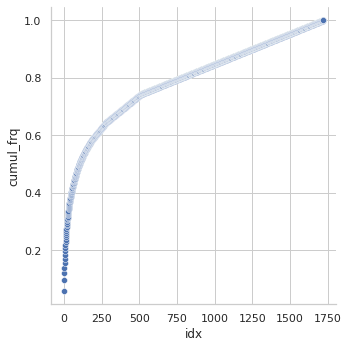

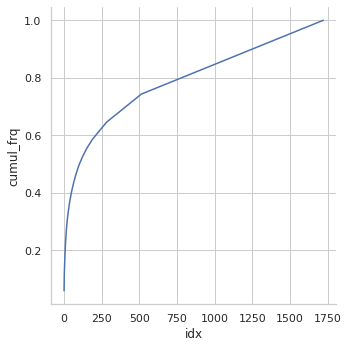

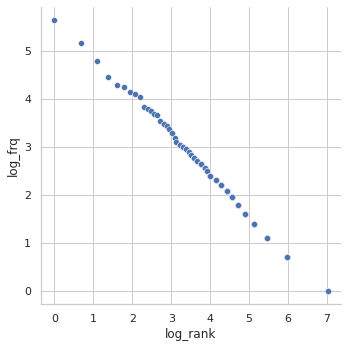

Atheism
Corpus size: 3787	Dictionary size: 1572	Type/token ratio: 0.415



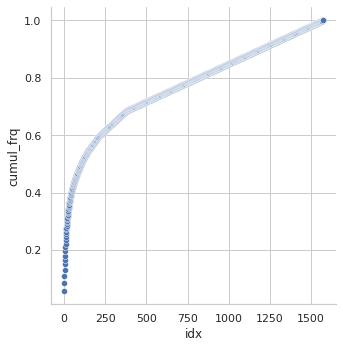

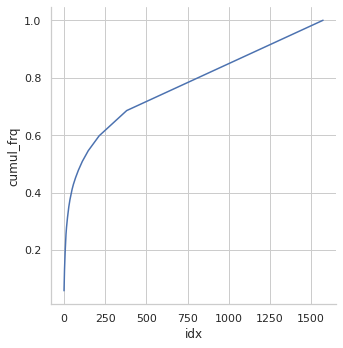

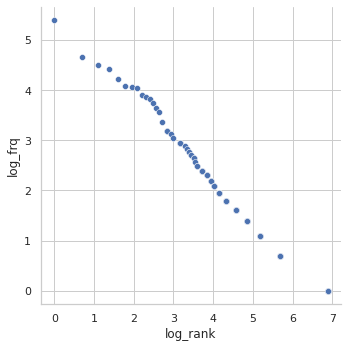

Climate
Corpus size: 2743	Dictionary size: 1284	Type/token ratio: 0.468



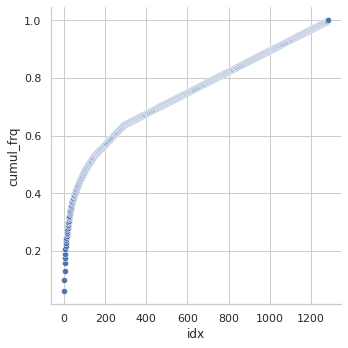

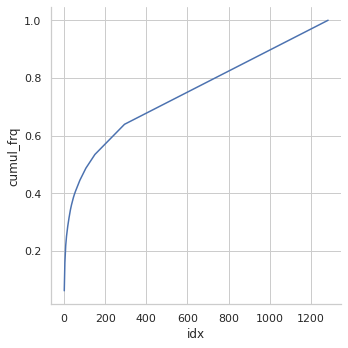

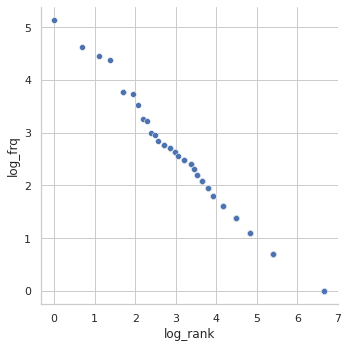

Feminist
Corpus size: 4901	Dictionary size: 1824	Type/token ratio: 0.372



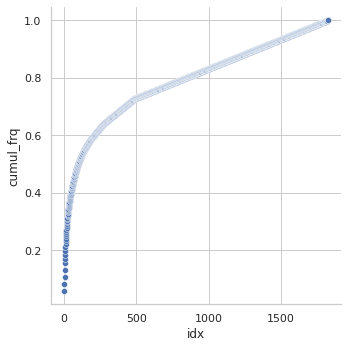

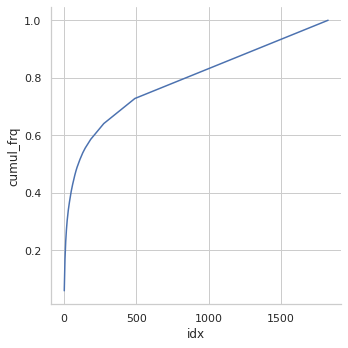

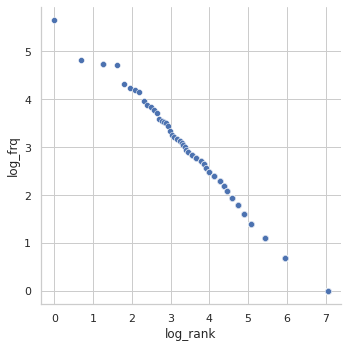

Hillary
Corpus size: 4781	Dictionary size: 1785	Type/token ratio: 0.373



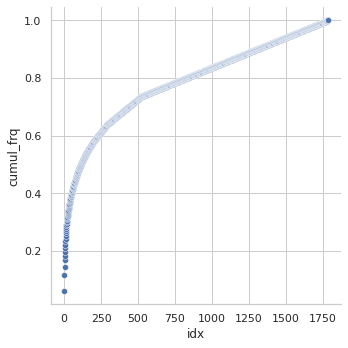

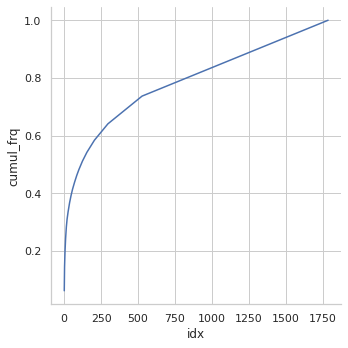

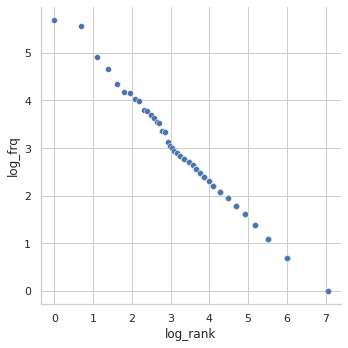

In [30]:
stances = ["abortion", "atheism", "climate", "feminist", "hillary"]
stance_texts = []
for stance in stances:
    with open(f"tweeteval/datasets/stance/{stance}/test_text.txt") as f:
        stance_texts.append(f.read())
for text, stance in zip(stance_texts, stances):
    print(stance.title())
    corpus = tokenize(pat, text)
    stats = statistics(corpus)
    print(f"Corpus size: {stats[0]}\tDictionary size: {stats[1]}\tType/token ratio: {stats[2]:.3}")
    print()
    zipf(corpus)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=e4cdc3a5-dd4a-4d72-a71a-972cea883107' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>